#  1.Kmeans Clustering

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import python libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
airlines = pd.read_excel('D:/Python/datasets/EastWestAirlines.xlsx')              # Importing dataset
airlines.head()                                                                   # print first 5 data from dataset

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
airlines.drop('ID#',axis=1,inplace=True)             # Drops ID, Award variables from dataset , cause this variables impact less in the model
airlines.drop('Award?',axis=1,inplace=True)

In [5]:
airlines.info()                              # this function shows information about dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
dtypes: int64(10)
memory usage: 312.6 KB


### Scaling the data

In [6]:
from sklearn.preprocessing import StandardScaler      # import standardscaler function to standardise the data

In [7]:
scaler = StandardScaler()                              # assign scaler object to store data

In [8]:
scaled_data = (scaler.fit_transform(airlines))         # airlines data being standardise and stored in scaled_data
print(scaled_data)                                

[[-4.51140783e-01 -1.86298687e-01 -7.69578406e-01 ... -3.28603258e-01
  -3.62167870e-01  1.39545434e+00]
 [-5.39456874e-01 -1.86298687e-01 -7.69578406e-01 ... -3.28603258e-01
  -3.62167870e-01  1.37995704e+00]
 [-3.20031232e-01 -1.86298687e-01 -7.69578406e-01 ... -3.28603258e-01
  -3.62167870e-01  1.41192021e+00]
 ...
 [-4.29480975e-05 -1.86298687e-01  6.83121167e-01 ... -3.28603258e-01
  -3.62167870e-01 -1.31560393e+00]
 [-1.85606976e-01 -1.86298687e-01 -7.69578406e-01 ...  2.85309024e-02
  -9.85033311e-02 -1.31608822e+00]
 [-7.00507951e-01 -1.86298687e-01 -7.69578406e-01 ... -3.28603258e-01
  -3.62167870e-01 -1.31754109e+00]]


## Hyperparameter Tuning

In [9]:
from sklearn.cluster import KMeans                    # importing KMeans algorithm from sklearn.cluster

In [10]:
wcss = []                                             # creates within-cluster sum of squares empty list to store values

In [11]:
for k in range(1,5):                                  # creates for loop to get num.of clusters
    model = KMeans(n_clusters=k)                      # creates kmeans model with k clusters
    model.fit(scaled_data)                            # scaled data variables fit into the model
    wcss.append(model.inertia_)                       # stores the wcss values to each k

In [12]:
wcss                                                  # prints the wcss values

[39989.99999999998, 32088.295122155207, 28354.967552840862, 23808.15493936758]

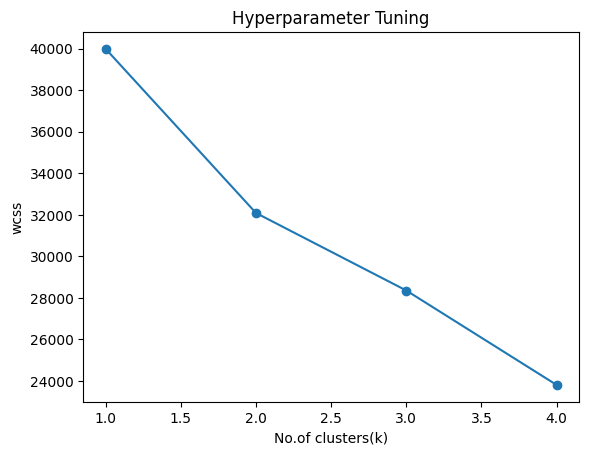

In [13]:
plt.plot(range(1,5),wcss,marker = 'o')                # visualise the wcss values
plt.title('Hyperparameter Tuning')                    # plot titles gives 'Hyperparameter Tuning'
plt.xlabel('No.of clusters(k)')                       # given X label name
plt.ylabel('wcss')                                    # given Y label name
plt.show()

## Build the model

In [14]:
from sklearn.cluster import KMeans             # Build the KMeans model

In [15]:
model = KMeans(n_clusters=3)                   # Num.of clusters assigned the model as 3 which get it from elbow method

In [16]:
model.fit(scaled_data)                         # model fit for scaled data

KMeans(n_clusters=3)

In [17]:
model.inertia_      # inertia_ attribute used here to determine the elbow point

30012.0000966986

In [18]:
model.labels_     

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [19]:
airlines['label'] = model.labels_               # label column added in dataset

In [20]:
airlines

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,label
0,28143,0,1,1,1,174,1,0,0,7000,1
1,19244,0,1,1,1,215,2,0,0,6968,1
2,41354,0,1,1,1,4123,4,0,0,7034,1
3,14776,0,1,1,1,500,1,0,0,6952,1
4,97752,0,4,1,1,43300,26,2077,4,6935,2
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,0
3995,64385,0,1,1,1,981,5,0,0,1395,0
3996,73597,0,3,1,1,25447,8,0,0,1402,0
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [21]:
grp = airlines.groupby('label')        # Num.of clusters printes by groupby function

In [22]:
for x,y in grp:
    print(y)
    print('____________________________________________'*5)

      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
1129     1625           0          1          1          1         1375   
1302    43403        1846          1          1          1         3350   
1424    22093           0          3          1          1        14857   
1431    44665           0          1          1          1          333   
1522     7291           0          1          1          1            0   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
1129            4      

In [23]:
grp.agg('mean')                 # prints the mean values of each numerical columns based on label 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
label,,,,,,,,,,
0,37887.462247,109.951504,1.344997,1.019644,1.000000,5813.770411,7.459177,227.588705,0.667894,2262.759975
1,60670.744255,94.280208,1.553002,1.013343,1.000741,7600.603410,9.114900,233.226093,0.700519,5790.675315
2,147667.188051,264.465230,3.868756,1.007835,1.047013,47833.882468,21.497551,1130.655240,3.388834,4870.188051


In [24]:
# cluster 0 : Medium balance, medium bonus miles, moderate flight activity.
# cluster 1 : Lowest balance, Lowest bonus miles, Lowest flight activity maybe cause of low-value customers.
# cluster 2 : Very high balance, very high bonus miles, very frequent flights → likely loyal, high-value customers.

# 2.DBscan Clustering

In [25]:
airline1=airlines[['Balance','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll']]

In [26]:
airline1.head()

,Balance,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,174,1,0,0,7000
1,19244,215,2,0,0,6968
2,41354,4123,4,0,0,7034
3,14776,500,1,0,0,6952
4,97752,43300,26,2077,4,6935


In [27]:
scaled_data = (scaler.fit_transform(airline1))         # airlines data being standardise and stored in scaled_data
print(scaled_data)

[[-4.51140783e-01 -7.02786266e-01 -1.10406452e+00 -3.28603258e-01
  -3.62167870e-01  1.39545434e+00]
 [-5.39456874e-01 -7.01088399e-01 -9.99926165e-01 -3.28603258e-01
  -3.62167870e-01  1.37995704e+00]
 [-3.20031232e-01 -5.39252702e-01 -7.91649446e-01 -3.28603258e-01
  -3.62167870e-01  1.41192021e+00]
 ...
 [-4.29480975e-05  3.43803696e-01 -3.75096007e-01 -3.28603258e-01
  -3.62167870e-01 -1.31560393e+00]
 [-1.85606976e-01 -6.89286154e-01 -1.10406452e+00  2.85309024e-02
  -9.85033311e-02 -1.31608822e+00]
 [-7.00507951e-01 -7.09991847e-01 -1.20820288e+00 -3.28603258e-01
  -3.62167870e-01 -1.31754109e+00]]


In [28]:
from sklearn.cluster import DBSCAN              # DBscan class derived from sklearn.cluster library

In [29]:
model = DBSCAN(eps=0.5, min_samples=10)         # dbscan model parameters as epslon as 0.5, minimum samples points given as 10 to make a cluster

In [30]:
labels = model.fit_predict(scaled_data)          # standardised data are given to predict the model

In [31]:
np.unique(labels)

array([-1,  0,  1,  2])

In [32]:
model.fit(scaled_data)                           # model is processed

DBSCAN(min_samples=10)

In [33]:
model.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
airline1['label'] = model.labels_                 # clusters are assinged to airline1 dataset

In [35]:
grp = airline1.groupby('label')                   # clusters are created by groupby process

In [36]:
grp.agg('mean')                                   # here aggregate function prints the mean of all numeric values

,Balance,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
label,,,,,,
-1,149439.956373,35519.110351,19.287425,1413.881095,4.131737,4777.787853
0,41765.168387,9290.056960,8.401922,65.107156,0.230331,3839.029904
1,100014.733333,61615.333333,14.933333,30.000000,0.266667,5829.933333
2,136303.500000,3400.000000,4.000000,600.000000,2.000000,2266.833333


In [37]:
# -1 - Likely represents outliers/high-value but unusual customers.
# 0 - Represents low balance, low miles, and low activity customers.
# 1 - These are customers with very high bonus miles but not much actual flying (maybe credit card rewards)
# 2 - These look like frequent flyers with higher balances but fewer bonus miles.

# 3.Hierarchical Clustering

In [38]:
from sklearn.preprocessing import MinMaxScaler          # here Minmaxscaler class used to rescale the values

In [39]:
scaler = MinMaxScaler()                                 # minmaxscaler function assign to scaler variable
scaled_data = scaler.fit_transform(airline1)            # rescale the values from airline1 dataset
scaled_data                                             # print the rescaled values

array([[1.65077268e-02, 6.59878264e-04, 1.16279070e-02, ...,
        0.00000000e+00, 8.43742464e-01, 3.33333333e-01],
       [1.12878760e-02, 8.15366820e-04, 2.32558140e-02, ...,
        0.00000000e+00, 8.39884254e-01, 3.33333333e-01],
       [2.42568502e-02, 1.56360809e-02, 4.65116279e-02, ...,
        0.00000000e+00, 8.47841813e-01, 3.33333333e-01],
       ...,
       [4.31694976e-02, 9.65052999e-02, 9.30232558e-02, ...,
        0.00000000e+00, 1.68796721e-01, 3.33333333e-01],
       [3.22018866e-02, 1.89620191e-03, 1.16279070e-02, ...,
        1.88679245e-02, 1.68676151e-01, 3.33333333e-01],
       [1.76908304e-03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.68314444e-01, 3.33333333e-01]])

In [40]:
from sklearn.cluster import AgglomerativeClustering      # hierarchical clustering method is import from cluster class

In [41]:
model = AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='complete')   # hierarchical clustering parameters are given as num.of clusters as 3, and metric as 'euclidean'

In [42]:
model.fit(scaled_data)                                 # created model is fit the rescaled values

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [43]:
model.labels_                                        # labes_ informs how many clusters are formed

array([2, 2, 2, ..., 2, 2, 2])

In [44]:
airline1['label'] = model.labels_                    # formed clusters are assigned to dataset

In [45]:
airline1.head()                                      # print the values

,Balance,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,label
0,28143,174,1,0,0,7000,2
1,19244,215,2,0,0,6968,2
2,41354,4123,4,0,0,7034,2
3,14776,500,1,0,0,6952,2
4,97752,43300,26,2077,4,6935,2


In [46]:
airline1.groupby('label').agg('mean')                  # dataset values are grouping by label variable and aggregated the mean of all numeric values

,Balance,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
label,,,,,,
0,237936.663793,70774.068966,29.922414,3823.853448,12.103448,5543.060345
1,131999.500000,65634.250000,69.250000,19960.000000,49.250000,2200.250000
2,68626.722867,15491.083011,10.994586,339.354473,1.003351,4077.938386


In [47]:
from scipy.cluster import hierarchy     # Hierarchy from scipy.cluster given to visualize dendrogram

In [48]:
hr = hierarchy.linkage(scaled_data, method='complete')     # here linkage parameters are given to visualize

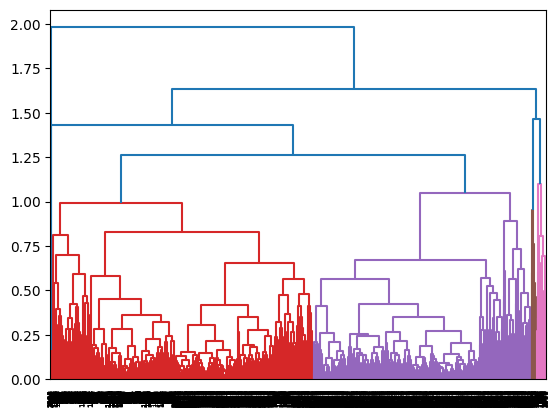

In [49]:
dn = hierarchy.dendrogram(hr, color_threshold=1.25)        # dendrogram is project clusters by different colors